In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

In [2]:
def ModelScore(y_test, y_pred):
    print("Accuracy - "+str(accuracy_score(y_test, y_pred)))
    print("Precision Score - "+str(precision_score(y_test, y_pred)))
    print("f1 Score - "+str(f1_score(y_test, y_pred)))
    print("Recall Score - "+str(recall_score(y_test, y_pred)))

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Balajisri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Balajisri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state = 0)
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred_LR = logisticReg.predict(X_test)
ModelScore(y_test, y_pred_LR)

Accuracy - 0.89
Precision Score - 0.8888888888888888
f1 Score - 0.8135593220338982
Recall Score - 0.75


Confusion matrix, without normalization


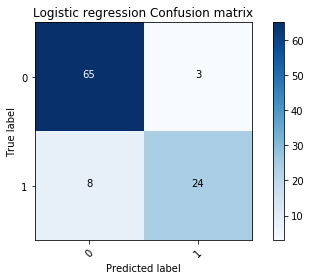

In [9]:
cnf_matrix = confusion_matrix(y_test, y_pred_LR)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=logisticReg.classes_,
                      title='Logistic regression Confusion matrix')

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_pred_knn = model_KNN.predict(X_test)
ModelScore(y_test, y_pred_knn)

Accuracy - 0.93
Precision Score - 0.8787878787878788
f1 Score - 0.8923076923076922
Recall Score - 0.90625


Confusion matrix, without normalization


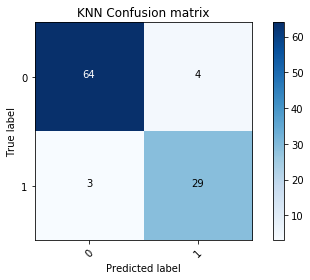

In [12]:
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_KNN.classes_,
                      title='KNN Confusion matrix')

# SVM

In [13]:
from sklearn.svm import SVC
model_SVM = SVC(kernel = 'linear', random_state = 0)
model_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred_SVM = model_SVM.predict(X_test)
ModelScore(y_test, y_pred_SVM)

Accuracy - 0.9
Precision Score - 0.9230769230769231
f1 Score - 0.8275862068965517
Recall Score - 0.75


Confusion matrix, without normalization


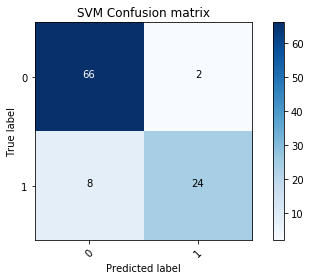

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred_SVM)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_SVM.classes_,
                      title='SVM Confusion matrix')

# SVC

In [16]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 0)
model_SVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred_SVC = model_SVC.predict(X_test)
ModelScore(y_test, y_pred_SVC)

Accuracy - 0.93
Precision Score - 0.8787878787878788
f1 Score - 0.8923076923076922
Recall Score - 0.90625


Confusion matrix, without normalization


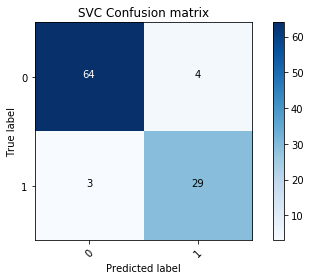

In [18]:
cnf_matrix = confusion_matrix(y_test, y_pred_SVC)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_SVC.classes_,
                      title='SVC Confusion matrix')

# Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
y_pred_GNB = model_GNB.predict(X_test)
ModelScore(y_test, y_pred_GNB)

Accuracy - 0.9
Precision Score - 0.8928571428571429
f1 Score - 0.8333333333333334
Recall Score - 0.78125


Confusion matrix, without normalization


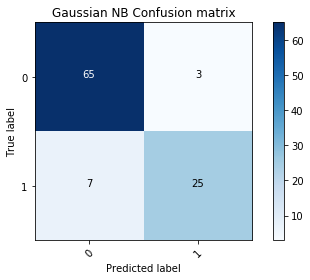

In [21]:
cnf_matrix = confusion_matrix(y_test, y_pred_GNB)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_GNB.classes_,
                      title='Gaussian NB Confusion matrix')

# Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
y_pred_DTC = model_DTC.predict(X_test)
ModelScore(y_test, y_pred_DTC)

Accuracy - 0.91
Precision Score - 0.8285714285714286
f1 Score - 0.8656716417910447
Recall Score - 0.90625


Confusion matrix, without normalization


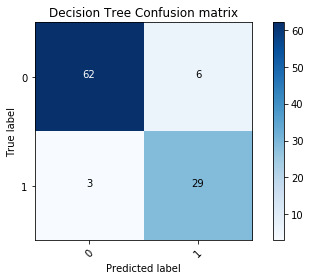

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred_DTC)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_DTC.classes_,
                      title='Decision Tree Confusion matrix')

# Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
y_pred_RF = model_RF.predict(X_test)
ModelScore(y_test, y_pred_RF)

Accuracy - 0.92
Precision Score - 0.8529411764705882
f1 Score - 0.8787878787878787
Recall Score - 0.90625


Confusion matrix, without normalization


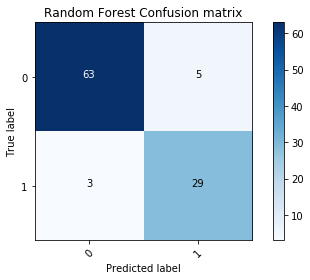

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred_RF)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=model_RF.classes_,
                      title='Random Forest Confusion matrix')